In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py

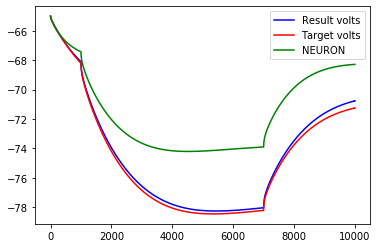

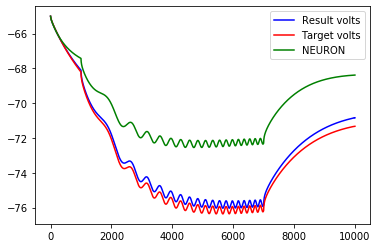

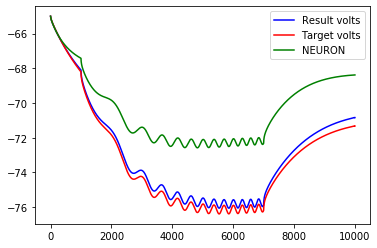

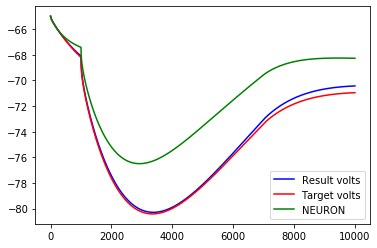

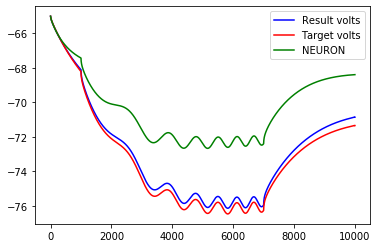

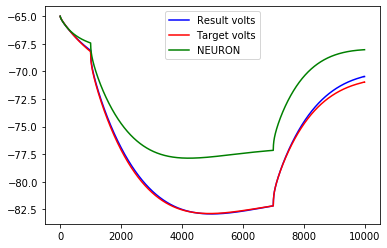

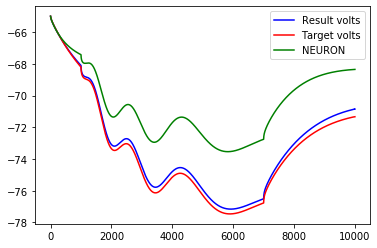

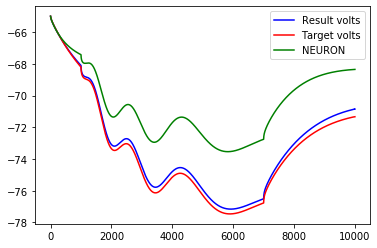

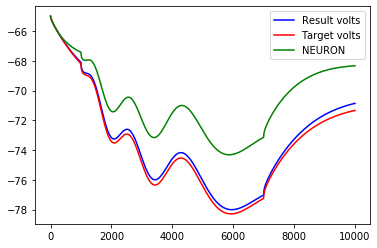

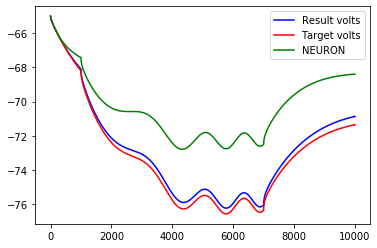

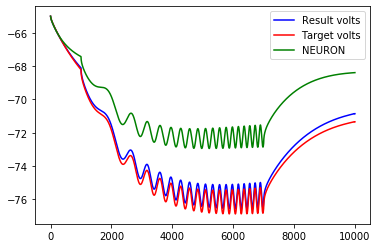

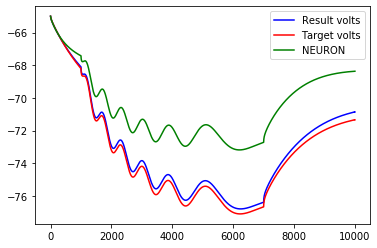

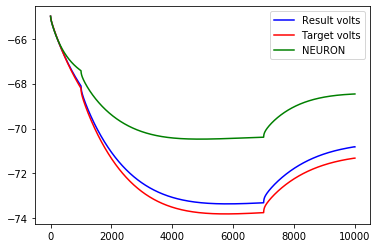

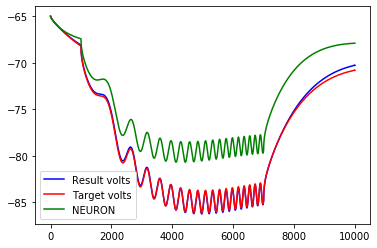

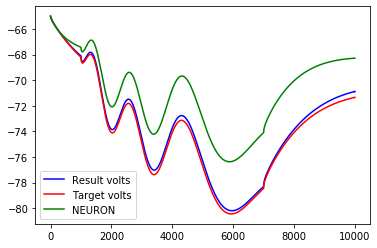

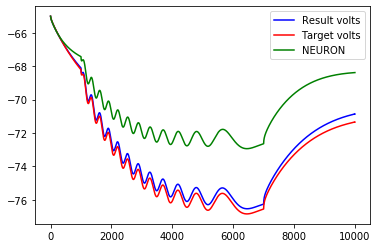

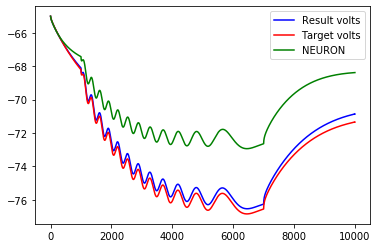

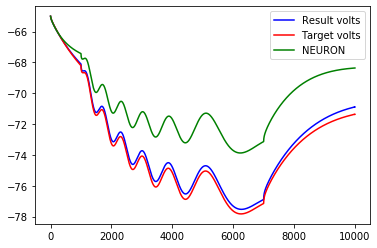

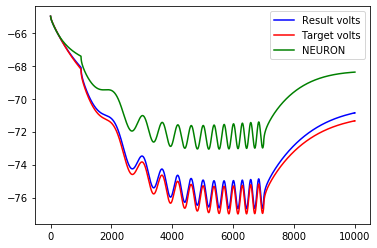

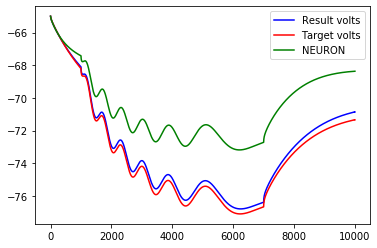

In [4]:
targetFile = np.genfromtxt("targetVolts.csv", delimiter=",")
resultFile = np.genfromtxt("resultVolts.csv", delimiter=",")
nrnFile = np.genfromtxt("neuronVolts.csv", delimiter=",")



for targ,res,nrn in zip(targetFile,resultFile,nrnFile):
    plt.figure()
    plt.plot(res, color="blue", label="Result volts")
    plt.plot(targ, color="red", label="Target volts")
    plt.plot(nrn, color='green', label="NEURON")
    plt.legend()


In [2]:
import os
os.chdir("../../neuron_genetic_alg/neuron_files/bbp/")
from neuron import h
os.chdir("../../../GPU_genetic_alg/python")

In [5]:
os.getcwd()

'/global/cscratch1/sd/zladd/axonstandardized/playground/runs/bbp_potassium_01_26_2021/genetic_alg/GPU_genetic_alg/python'

In [6]:
inputFile = open("../../../../../input.txt","r") 
for line in inputFile.readlines():
    if "bbp" in line:
        from config.bbp19_config import *
    elif "allen" in line:
        from config.allen_config import *

In [1]:


def run_single_volts(param_set, stim_data, ntimestep = 10000, dt = 0.02):
    run_file = '../../neuron_genetic_alg/neuron_files/bbp/run_model_cori.hoc'
    h.load_file(run_file)
    total_params_num = len(param_set)
    timestamps = np.array([dt for i in range(ntimestep)])
    h.curr_stim = h.Vector().from_python(stim_data)
    h.transvec = h.Vector(total_params_num, 1).from_python(param_set)
    h.stimtime = h.Matrix(1, len(timestamps)).from_vector(h.Vector().from_python(timestamps))
    h.ntimestep = ntimestep
    h.runStim()
    out = h.vecOut.to_python()
    return np.array(out),np.cumsum(timestamps)

param_set = list(orig_params)
opt_stim_name_list = objectives_file['opt_stim_name_list'][:]
score_function_ordered_list = objectives_file['ordered_score_function_list'][:]
stims_path = '../../stims/' + inputs['stim_file'] + '.hdf5'
stim_file = h5py.File(stims_path, 'r')
for i in range(len(opt_stim_name_list)):
    run_single_volts(param_set,stim_file[opt_stim_name_list[i]][:])

NameError: name 'orig_params' is not defined

<KeysViewHDF5 ['chirp_f_0.05_to_0_a_0.05_to_0.05_m_-0.1', 'chirp_f_0.05_to_0_a_0.05_to_0.1_m_-0.1', 'chirp_f_0.05_to_0_a_0.05_to_0.2_m_-0.1', 'chirp_f_0.05_to_0_a_0.1_to_0.05_m_-0.1', 'chirp_f_0.05_to_0_a_0.1_to_0.1_m_-0.1', 'chirp_f_0.05_to_0_a_0.2_to_0.05_m_-0.1', 'chirp_f_0.05_to_0_a_0.2_to_0.2_m_-0.1', 'chirp_f_0.05_to_0_a_0.2_to_0.2_m_-0.3', 'chirp_f_0.05_to_0_a_0.2_to_0.3_m_-0.3', 'chirp_f_0.05_to_0_a_0.2_to_0.4_m_-0.3', 'chirp_f_0.05_to_0_a_0.3_to_0.2_m_-0.3', 'chirp_f_0.05_to_0_a_0.3_to_0.3_m_-0.3', 'chirp_f_0.05_to_0_a_0.4_to_0.2_m_-0.3', 'chirp_f_0.05_to_0_a_0.4_to_0.4_m_-0.3', 'chirp_f_0.1_to_0_a_0.05_to_0.05_m_-0.1', 'chirp_f_0.1_to_0_a_0.05_to_0.1_m_-0.1', 'chirp_f_0.1_to_0_a_0.05_to_0.2_m_-0.1', 'chirp_f_0.1_to_0_a_0.1_to_0.05_m_-0.1', 'chirp_f_0.1_to_0_a_0.1_to_0.1_m_-0.1', 'chirp_f_0.1_to_0_a_0.2_to_0.05_m_-0.1', 'chirp_f_0.1_to_0_a_0.2_to_0.2_m_-0.1', 'chirp_f_0.1_to_0_a_0.2_to_0.2_m_-0.3', 'chirp_f_0.1_to_0_a_0.2_to_0.3_m_-0.3', 'chirp_f_0.1_to_0_a_0.2_to_0.4_m_-0.3',